# Principal Components Analysis(PCA)

### Importing the necessary libraries 

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


### Importing the dataset 

In [65]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal_length', 'sepal_width' , 'petal_length', 'petal_width', 'species'])

### Visualizing the dataset

In [66]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


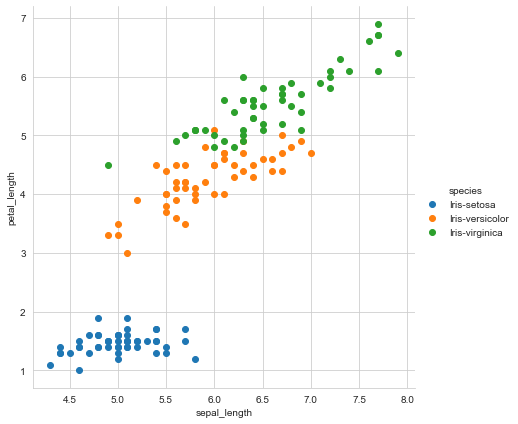

In [68]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue ="species", height = 6).map(plt.scatter, 'sepal_length','petal_length').add_legend()
plt.show()

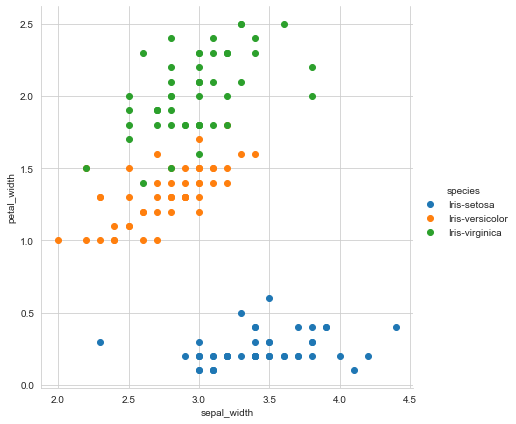

In [69]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue ="species", height = 6).map(plt.scatter, 'sepal_width','petal_width').add_legend()
plt.show()

### Lets use PCA to reduce the features

## Step 1: Standardization

In [70]:
from sklearn.preprocessing import StandardScaler

features = ['sepal_length', 'sepal_width' , 'petal_length', 'petal_width']

X = df.loc[:, features].values

y = df.loc[:, ['species']].values

X = StandardScaler().fit_transform(X)

## Step 2: Covariance matrix 

In [71]:
covariance_matrix = np.cov(X.T)


## Step 3:  Calculate Eigenvectors and eigenvalues

In [72]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

## Step 4: Selelct Principal components 

In [73]:
pc1 = eigenvectors[:, 0].dot(X.T)
pc2 = eigenvectors[:, 1].dot(X.T)

In [74]:
pcaDataframe = pd.DataFrame()

In [75]:
pcaDataframe['PC1']=pc1
pcaDataframe['PC2']=pc2
pcaDataframe['species']=y

In [76]:
pcaDataframe

,PC1,PC2,species
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.367950,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa
...,...,...,...
145,1.870522,-0.382822,Iris-virginica
146,1.558492,0.905314,Iris-virginica
147,1.520845,-0.266795,Iris-virginica
148,1.376391,-1.016362,Iris-virginica


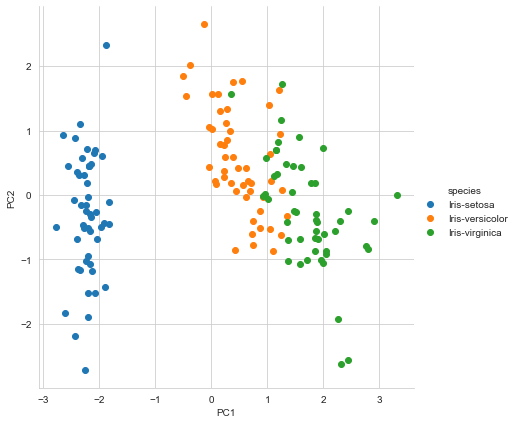

In [77]:
sns.set_style("whitegrid")
sns.FacetGrid(pcaDataframe, hue ="species", height = 6).map(plt.scatter, 'PC1','PC2').add_legend()
plt.show()

## Using Sklearn PCA 

In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

In [79]:
targetDataframe = df[['species']]

newpcaDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

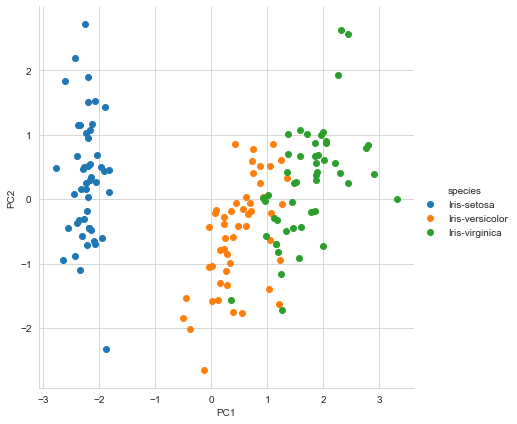

In [80]:
sns.set_style("whitegrid")
sns.FacetGrid(newpcaDataframe, hue ="species", height = 6).map(plt.scatter, 'PC1','PC2').add_legend()
plt.show()

In [81]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577]])